#  Show Spectra features holo at AuxTel for Configuration Hb

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : April 4th  2022
- last update : April 5th 2022


### Configuration Hb :

    


- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

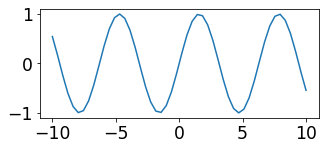

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-04-08'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.2.0'

In [11]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [12]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [13]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [14]:
from time import sleep

In [15]:
from astropy.time import Time
import astropy.units as u

In [16]:
import pickle

# Function

In [17]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [18]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [19]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [20]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [21]:
# path index for each month
DATE="20220317"

In [22]:
version="v5.0"

In [23]:
# Choose the config filename

list_of_spectractorconfigfiles= ["auxtel_configA.ini","auxtel_configB.ini","auxtel_configC.ini","auxtel_configD.ini","auxtel_configE.ini","auxtel_configF.ini","auxtel_configG.ini","auxtel_configHb.ini"]
config_idx =7
configfilename= os.path.join("./config",list_of_spectractorconfigfiles[config_idx])
configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]


In [24]:
configdir 

'configHb'

# Path

In [25]:
HOSTCC=True

In [26]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/holo/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/holo/"+configdir+"/"+DATE)
    
else:
    #path_auxtel="/Users/dagoret/DATA/AuxTelData2021"
    path_auxtel="/Users/sylvie/DATA/AuxTelDATA2022/2022"
    #path_spectractor=os.path.join(path_auxtel,"/users/dagoret/MacOSX/github/LSST/Spectractor")
    path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    #path_images=os.path.join(path_auxtel,"holo/quickLookExp_v2/"+DATE)
    path_images=os.path.join(path_auxtel,"holo/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"OutputSpectractor/holo/"+configdir+"/"+DATE)
    #path_output_spectractor=os.path.join(path_auxtel,"holo/OutputSpectractor/"+DATE)
    

In [27]:
path_output_spectractor

'/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317'

In [28]:
! ls -l $path_output_spectractor

total 0
drwxrws--- 1 dagoret lsst 2 Apr  4 17:54 2022031700237
drwxrws--- 1 dagoret lsst 2 Apr  4 20:16 2022031700238
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700244
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700245
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700251
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700252
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700258
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700259
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700265
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700266
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700272
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700273
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700279
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700280
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700286
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700287
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700293
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700294
dr

In [29]:
# standard configuration for spectractor
#config = os.path.join(path_spectractor_config,"auxtel.ini")
#config=os.path.join("./config",configfilename)
config=configfilename
print(f">>>>> Spectractor configuration filename : {configfilename}")

>>>>> Spectractor configuration filename : ./config/auxtel_configHb.ini


## Logbook for file selection

In [30]:
# Logbook for scan data
filename_logbook='logbooks/auxtelholologbook_'+DATE+'_'+ version+'.csv'

In [31]:
df=pd.read_csv(filename_logbook,index_col=0)

In [32]:
pd.set_option('display.max_rows', None)

In [33]:
df

index                     date  \
0       0  2022-03-18T00:51:03.112   
1       1  2022-03-18T00:51:36.190   
2       2  2022-03-18T00:54:30.463   
3       3  2022-03-18T00:55:03.377   
4       4  2022-03-18T00:58:01.707   
5       5  2022-03-18T00:58:34.835   
6       6  2022-03-18T01:01:32.859   
7       7  2022-03-18T01:02:05.775   
8       8  2022-03-18T01:05:03.839   
9       9  2022-03-18T01:05:36.766   
10     10  2022-03-18T01:08:32.232   
11     11  2022-03-18T01:09:05.133   
12     12  2022-03-18T01:12:00.164   
13     13  2022-03-18T01:12:33.079   
14     14  2022-03-18T01:15:32.735   
15     15  2022-03-18T01:16:05.627   
16     16  2022-03-18T01:18:59.663   
17     17  2022-03-18T01:19:32.577   
18     18  2022-03-18T01:22:30.386   
19     19  2022-03-18T01:23:03.286   
20     20  2022-03-18T01:43:39.078   
21     21  2022-03-18T01:44:11.982   
22     22  2022-03-18T01:47:06.515   
23     23  2022-03-18T01:47:39.407   
24     24  2022-03-18T01:50:33.593   
25     25  2022-03-18T01:51:06.516   
26     26  2022-03-18T01:54:00.883   
27     27  2022-03-18T01:54:33.856   
28     28  2022-03-18T01:57:30.505   
29     29  2022-03-18T01:58:03.446   
30     30  2022-03-18T02:01:00.181   
31     31  2022-03-18T02:01:33.339   
32     32  2022-03-18T02:04:30.946   
33     33  2022-03-18T02:05:03.843   
34     34  2022-03-18T02:08:03.232   
35     35  2022-03-18T02:08:36.262   
36     36  2022-03-18T02:11:34.200   
37     37  2022-03-18T02:12:07.156   
38     38  2022-03-18T02:15:00.952   
39     39  2022-03-18T02:15:33.886   
40     40  2022-03-18T02:33:14.260   
41     41  2022-03-18T02:33:47.167   
42     42  2022-03-18T02:36:45.029   
43     43  2022-03-18T02:37:17.962   
44     44  2022-03-18T02:40:14.985   
45     45  2022-03-18T02:40:47.930   
46     46  2022-03-18T02:43:46.361   
47     47  2022-03-18T02:44:19.255   
48     48  2022-03-18T02:47:16.976   
49     49  2022-03-18T02:47:49.912   
50     50  2022-03-18T02:50:52.460   
51     51  2022-03-18T02:51:25.626   
52     52  2022-03-18T03:08:55.717   
53     53  2022-03-18T03:09:28.629   
54     54  2022-03-18T03:13:08.467   
55     55  2022-03-18T03:13:41.360   
56     56  2022-03-18T03:17:20.920   
57     57  2022-03-18T03:17:53.934   
58     58  2022-03-18T03:21:41.018   
59     59  2022-03-18T03:22:14.022   

                                               path  \
0   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
1   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
2   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
3   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
4   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
5   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
6   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
7   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
8   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
9   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
10  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
11  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
12  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
13  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
14  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
15  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
16  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
17  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
18  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
19  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
20  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
21  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
22  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
23  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
24  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
25  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
26  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
27  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
28  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
29  /sps/lsst/groups/auxtel/data/20

## Selection of input files

In [34]:
# Do not consider flag
#df_good=df[df["quality"]==1]

In [35]:
df_good=df
df_good["quality"] = 1

In [36]:
for spectra_file in df_good["file"]:
    print(spectra_file)

exposure_2022031700237_postisrccd.fits
exposure_2022031700238_postisrccd.fits
exposure_2022031700244_postisrccd.fits
exposure_2022031700245_postisrccd.fits
exposure_2022031700251_postisrccd.fits
exposure_2022031700252_postisrccd.fits
exposure_2022031700258_postisrccd.fits
exposure_2022031700259_postisrccd.fits
exposure_2022031700265_postisrccd.fits
exposure_2022031700266_postisrccd.fits
exposure_2022031700272_postisrccd.fits
exposure_2022031700273_postisrccd.fits
exposure_2022031700279_postisrccd.fits
exposure_2022031700280_postisrccd.fits
exposure_2022031700286_postisrccd.fits
exposure_2022031700287_postisrccd.fits
exposure_2022031700293_postisrccd.fits
exposure_2022031700294_postisrccd.fits
exposure_2022031700300_postisrccd.fits
exposure_2022031700301_postisrccd.fits
exposure_2022031700309_postisrccd.fits
exposure_2022031700310_postisrccd.fits
exposure_2022031700316_postisrccd.fits
exposure_2022031700317_postisrccd.fits
exposure_2022031700323_postisrccd.fits
exposure_2022031700324_po

## Selection of Spectractor output files

In [37]:
# total number of exposures
NBEXP=0
# total number of exposures without dir
NBEXPNODIR=0
# total number of exposures with dir
NBEXPWTHDIR=0
# total number of exposures with plots
NBEXPWTHPLT=0
# total number of exposures with spectra
NBEXPWTHSPEC=0

# list of exposures
LISTNUM=[]
# list of exposure without dir (not run spectraction)
LISTNUMNODIR=[]
# list of exposure with dir (spectraction has been run)
LISTNUMWTHDIR=[]
# list of exposures with plots (Spectractor has run up to some point)
LISTNUMWTHPLOTS=[]
# list of exposures with spectraction output (Spectractor has completed)
LISTNUMWTHSPECTR=[]

# list of selected spectra path
List_of_spectra_path=[]

In [38]:
list_of_files=os.listdir(path_output_spectractor)
list_of_files=sorted(list_of_files)


print("list of subdir found ",list_of_files)

for subdir in list_of_files:
    
    
    #tag = file_tag_forsorting(subdir)
    tag = subdir_tag_forsorting(subdir)
    
        
    print(tag)    
    #if tag is not None and int(tag)<317:
    #    continue
    if tag is None :
        continue
  
    
    
    fulldir=os.path.join(path_output_spectractor,subdir)



    if not os.path.isdir(fulldir):
        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is not a directory".format(subdir))
        

        NBEXPNODIR+=1


    else:

        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is a directory".format(subdir))

        tagname=subdir_tag_forsorting(subdir)
        print("tagname= {}".format(tagname))
        #targetname=file_target(subdir)
        #print("targetname= {}".format(targetname))
        



        NBEXP += 1
        LISTNUM.append(tagname)



        dir_plots=os.path.join(fulldir,"plots")
        dir_spectration = os.path.join(fulldir, "basespec")

        flag_empty1 = True
        flag_empty2 = True


        if os.path.isdir(dir_plots):
            if any(os.scandir(dir_plots)):
                print("dir_plots is not empty")
                NBEXPWTHPLT+=1
                LISTNUMWTHPLOTS.append(tagname)
                flag_empty1 = False

            else:
                print("dir_plots is empty")


        if os.path.isdir(dir_spectration):
            if any(os.scandir(dir_spectration)):
                print("dir_spectration is not empty")
                NBEXPWTHSPEC+=1
                LISTNUMWTHSPECTR.append(tagname)
                flag_empty2 = False
                List_of_spectra_path.append(dir_spectration)

            else:
                print("dir_spectration is empty")

        if flag_empty1 and flag_empty2 :
            NBEXPNODIR+=1
            LISTNUMNODIR.append(tagname)
        else:
            NBEXPWTHDIR += 1
            LISTNUMWTHDIR.append(tagname)



print("-----------------------------------------------------------------")


#LISTNUM=sorted(LISTNUM)
#LISTNUMNODIR=sorted(LISTNUMNODIR)
#LISTNUMWTHDIR=sorted(LISTNUMWTHDIR)
#LISTNUMWTHPLOTS=sorted(LISTNUMWTHPLOTS)
#LISTNUMWTHSPECTR=sorted(LISTNUMWTHSPECTR)
List_of_spectra_path=sorted(List_of_spectra_path)

print("Full list of Exposures : .......................{}".format(LISTNUM))
print("Full list of Exposures without output dir: .....{}".format(LISTNUMNODIR))
print("Full list of Exposures with output dir: ....... {}".format(LISTNUMWTHDIR))
print("Full list of Exposures with output plots: ..... {}".format(LISTNUMWTHPLOTS))
print("Full list of Exposures with output spectra: ....{}".format(LISTNUMWTHSPECTR))




print("Total number of exposures : .....................{}".format(NBEXP))
print("Total number of exposures without dir : .........{}".format(NBEXPNODIR))
print("Total number of exposures with dir :.............{}".format(NBEXPWTHDIR))
print("Total number of exposures with plots : ..........{}".format(NBEXPWTHPLT))
print("Total number of exposures with spectra: .........{}".format(NBEXPWTHSPEC))


list of subdir found  ['2022031700237', '2022031700238', '2022031700244', '2022031700245', '2022031700251', '2022031700252', '2022031700258', '2022031700259', '2022031700265', '2022031700266', '2022031700272', '2022031700273', '2022031700279', '2022031700280', '2022031700286', '2022031700287', '2022031700293', '2022031700294', '2022031700300', '2022031700301', '2022031700309', '2022031700310', '2022031700316', '2022031700317', '2022031700323', '2022031700324', '2022031700330', '2022031700331', '2022031700337', '2022031700338', '2022031700344', '2022031700345', '2022031700351', '2022031700352', '2022031700358', '2022031700359', '2022031700365', '2022031700366', '2022031700372', '2022031700373', '2022031700379', '2022031700380', '2022031700386', '2022031700387', '2022031700393', '2022031700394', '2022031700400', '2022031700401', '2022031700407', '2022031700408', '2022031700414', '2022031700415', '2022031700421', '2022031700422', '2022031700428', '2022031700429', '2022031700435', '2022031

In [39]:
#dir_spectra="outputs_reprocess"
print(List_of_spectra_path)

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700251/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700252/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700265/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700272/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700273/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700279/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700286/

In [40]:
config

'./config/auxtel_configHb.ini'

## Extraction of spectra

In [41]:
all_files_spectra = []
all_files_spectrogram = []
all_files_lines = []
all_files_table = []

# loop on topdir
for dir_spectra in List_of_spectra_path:
    for filename in os.listdir(dir_spectra):
        if re.search("_spectrum.fits$",filename):
            the_file_spectrum=os.path.join(dir_spectra,filename)
            all_files_spectra.append(the_file_spectrum)
            the_file_spectrogram=the_file_spectrum.replace("_spectrum","_spectrogram")
            all_files_spectrogram.append(the_file_spectrogram)
            the_file_lines=the_file_spectrum.replace("_spectrum.fits","_lines.csv")
            all_files_lines.append(the_file_lines)
            the_file_table=the_file_spectrum.replace("_spectrum.fits","_table.csv")
            all_files_table.append(the_file_table)
    

In [42]:
all_files_spectra[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec/exposure_2022031700245_postisrccd_spectrum.fits']

In [43]:
all_files_spectrogram[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec/exposure_2022031700245_postisrccd_spectrogram.fits']

In [44]:
all_files_lines[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec/exposure_2022031700245_postisrccd_lines.csv']

In [45]:
all_files_table[:3] 

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec/exposure_2022031700245_postisrccd_table.csv']

## Selection of good spectra

In [46]:
all_good_spectra_spectrum_files = sorted(all_files_spectra)

In [47]:
N=len(all_good_spectra_spectrum_files)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

## All Spectra

0 ) exposure_2022031700238_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_spectrum.fits
set date_obs to 2022-03-18T00:51:22.049
set expo to 20.0
set airmass to 1.11557476948966
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1753951396614214
set dec to -32.3064444444444
set hour_angle to 30.8762989508295
set temperature to 8.9
set pressure to 743.45
set humidity to 48.0
set lambda_ref to 626.6801216985461
set parallactic_angle to 93.8012496664173
target_name = mu.col, Selected object name for Simbad : mu. Col


/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


 MAIN_ID        RA           DEC      ...  Z_VALUE  SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                           
--------- ------------- ------------- ... --------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ... 0.0003640                1
1 ) exposure_2022031700244_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_spectrum.fits
set date_obs to 2022-03-18T00:54:16.312
set expo to 20.0
set airmass to 1.121576965054115
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1741806116248446
set dec to -32.3064444444444
set hour_angle to 31.60492174100415
set temperature to 8.9
set pressure to 743.45
set humidity to 49.0
set lambda_ref to 626.883564656571
set parallactic_angle to 94.10618686949074
target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ... Z_VALUE_2 SCRIP

/tmp/ipykernel_2755/3127726432.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(16,4))


set date_obs to 2022-03-18T02:04:16.794
set expo to 20.0
set airmass to 1.33727547076682
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1388486262435704
set dec to -32.3064444444444
set hour_angle to 49.15879882143194
set temperature to 8.5
set pressure to 743.45
set humidity to 58.0
set lambda_ref to 628.5424256920012
set parallactic_angle to 100.7251843777299
target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ... Z_VALUE_21 SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                            
--------- ------------- ------------- ... ---------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ...  0.0003640                1
21 ) exposure_2022031700352_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700352/basespec/exposure_2022031700352_postisrccd_spectrum.fits
set date_obs to 2022-03-18T02:04:49.712
set expo to 

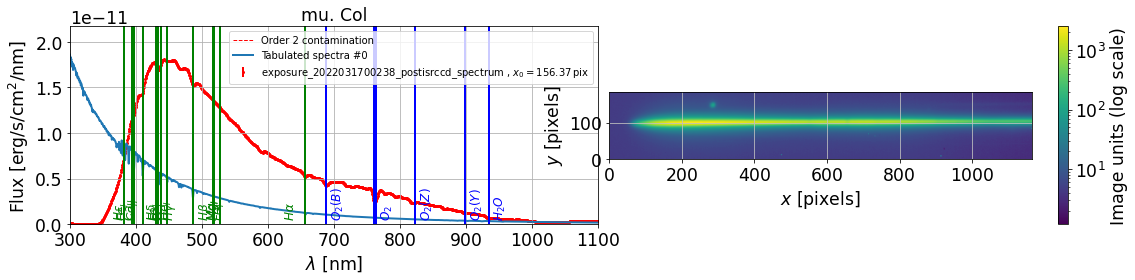

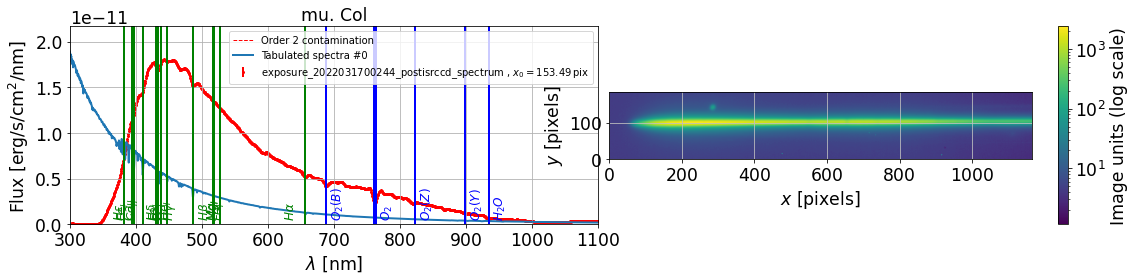

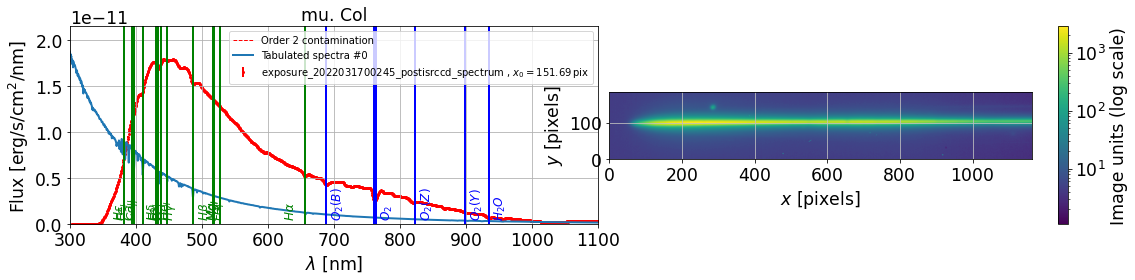

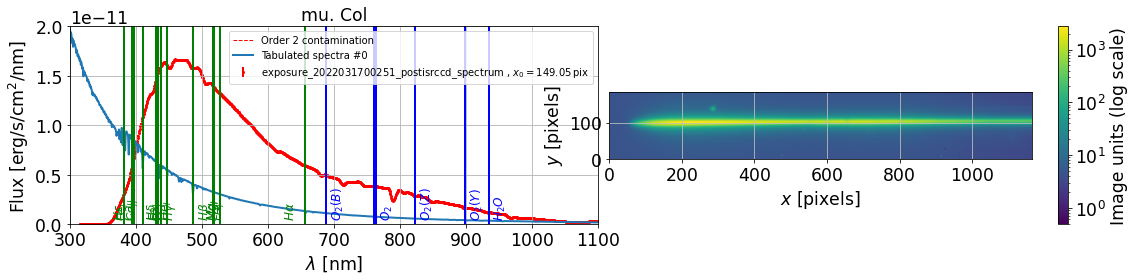

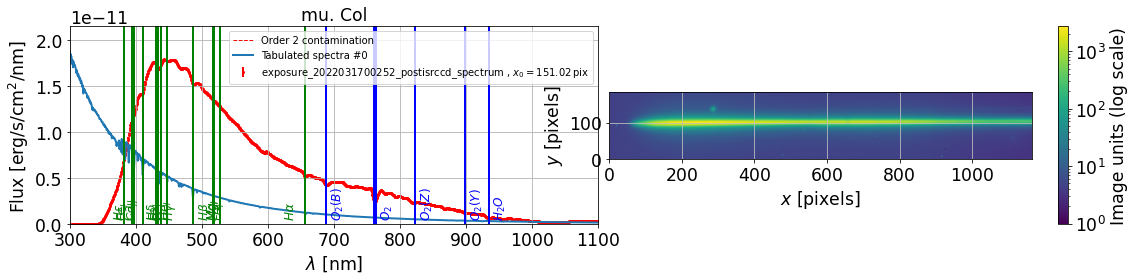

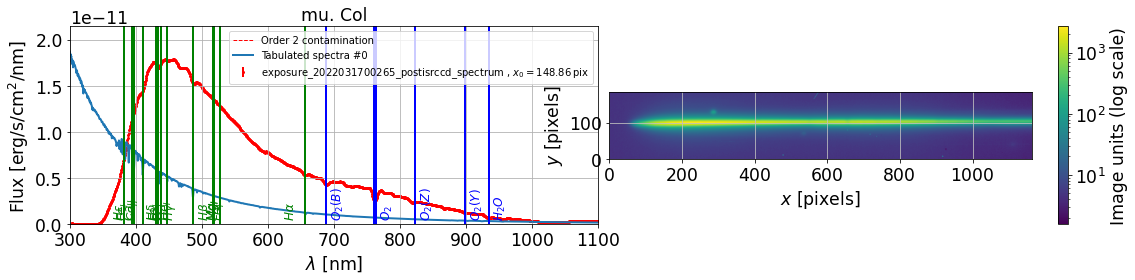

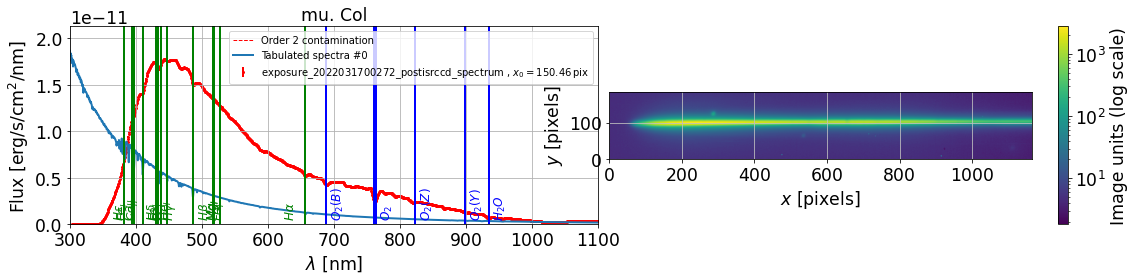

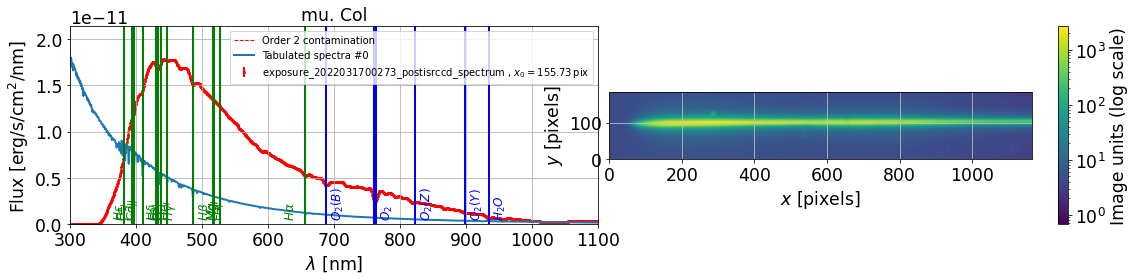

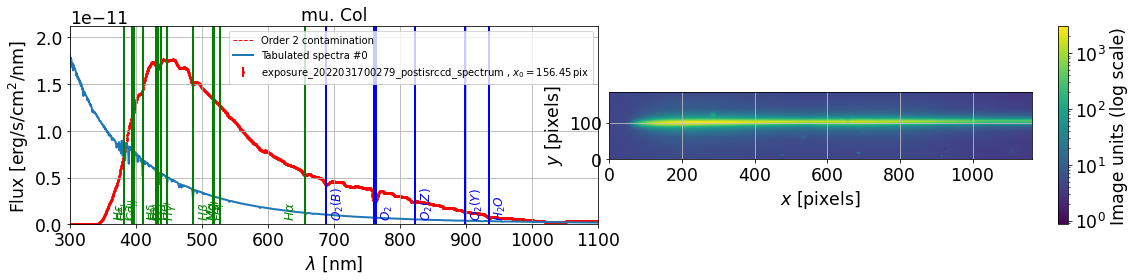

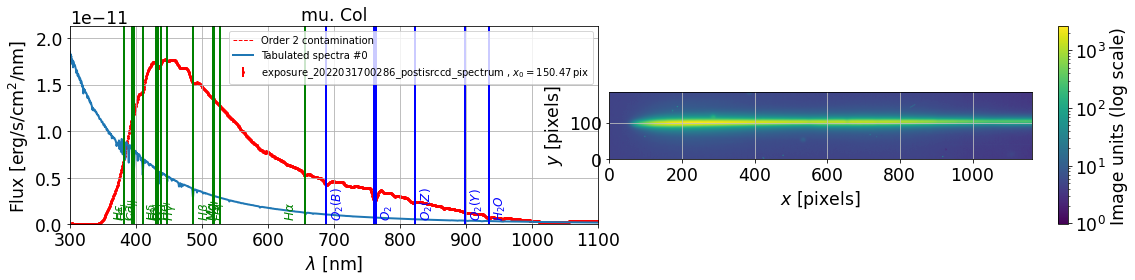

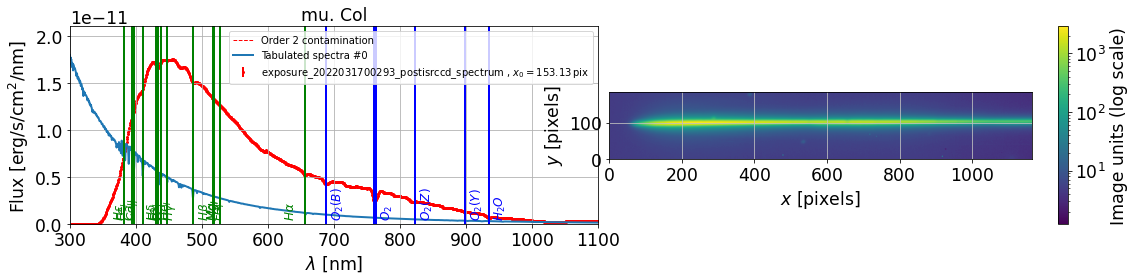

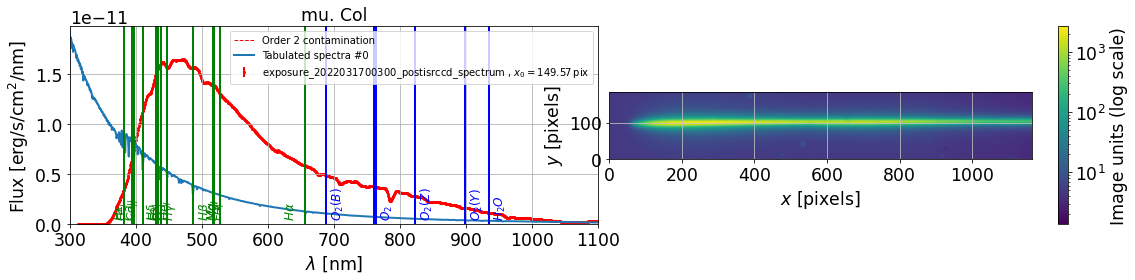

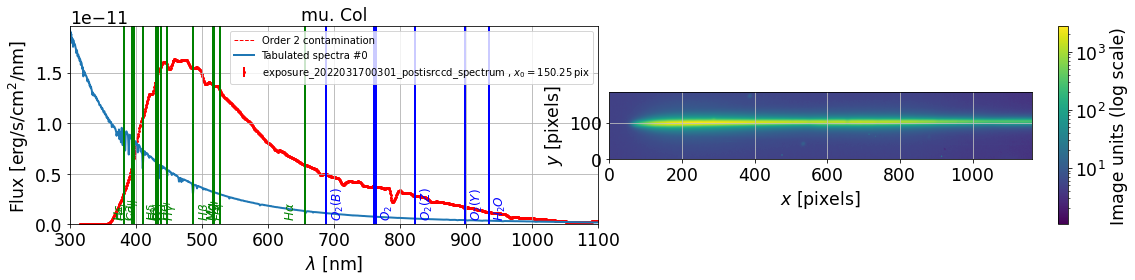

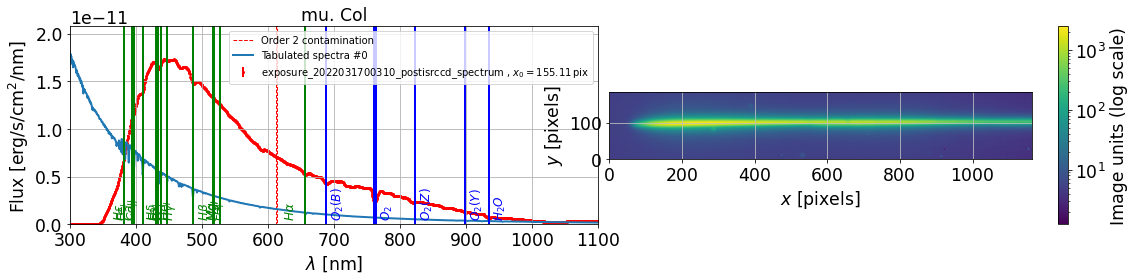

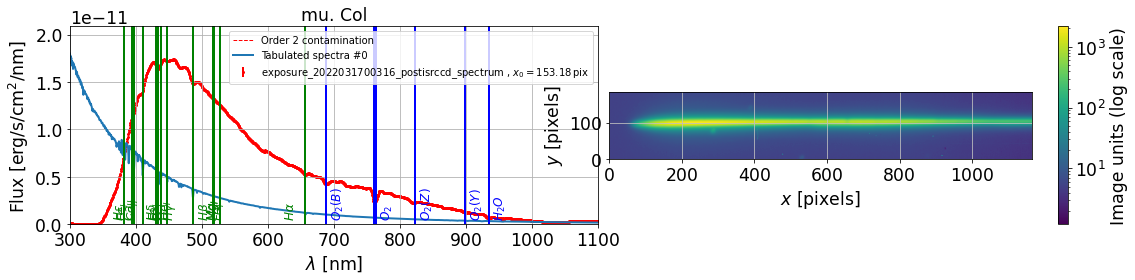

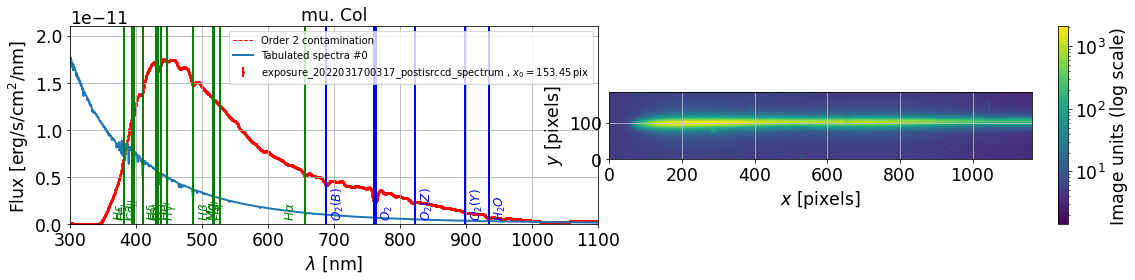

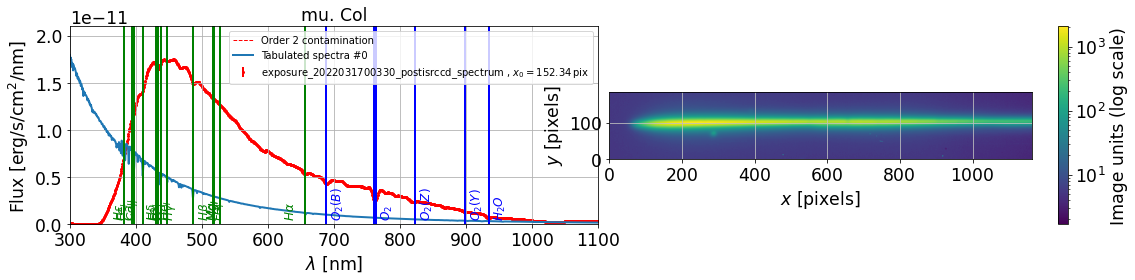

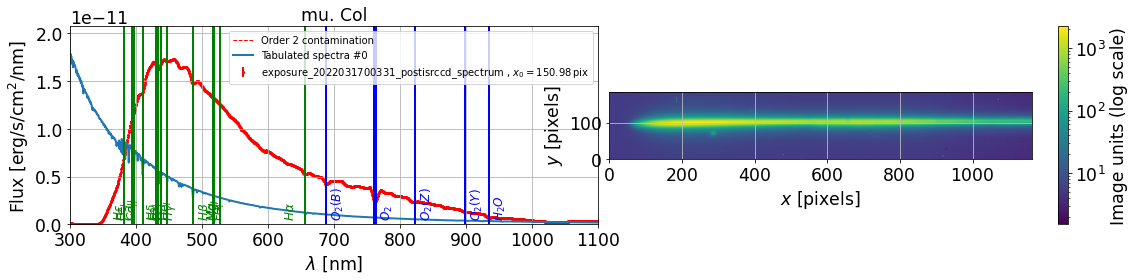

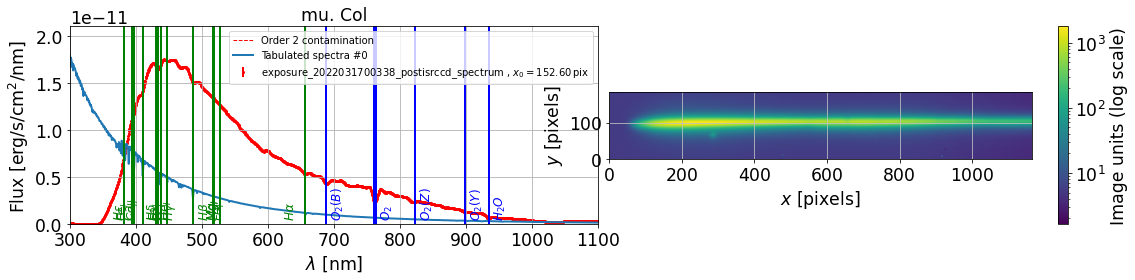

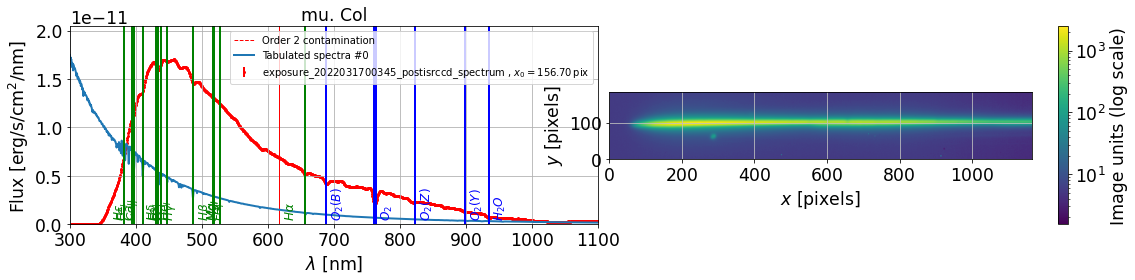

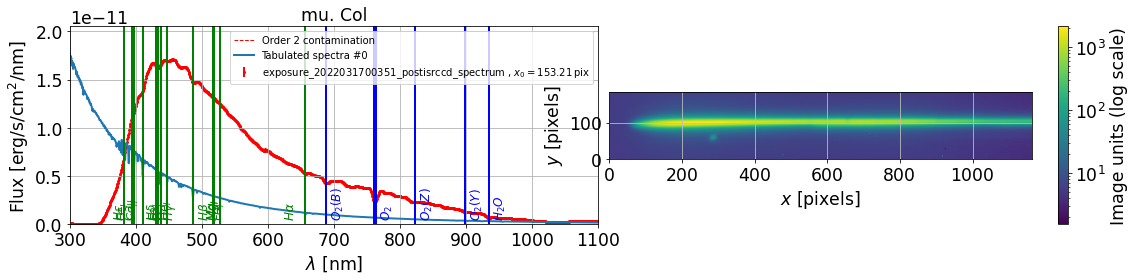

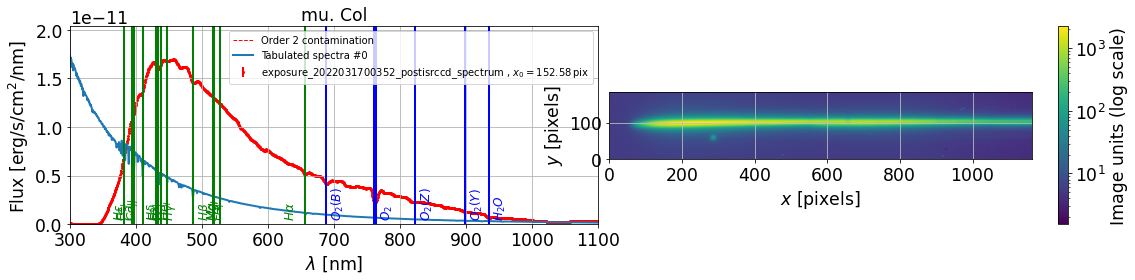

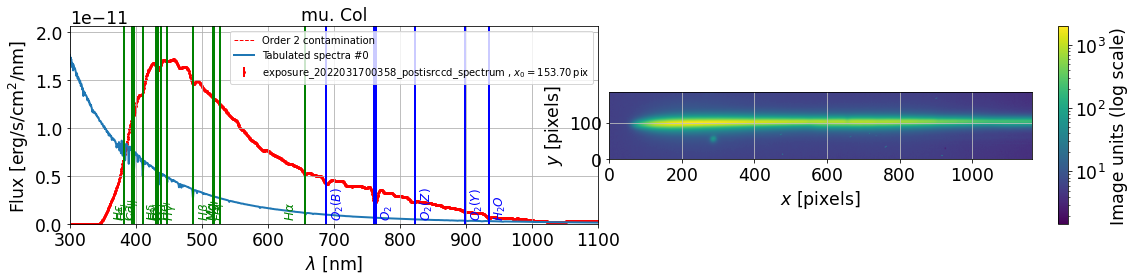

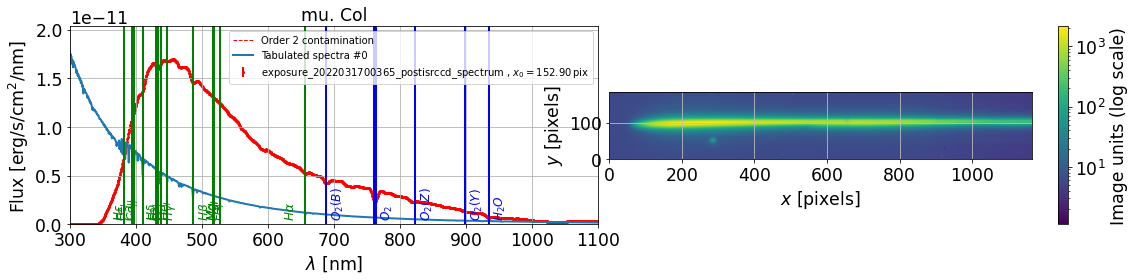

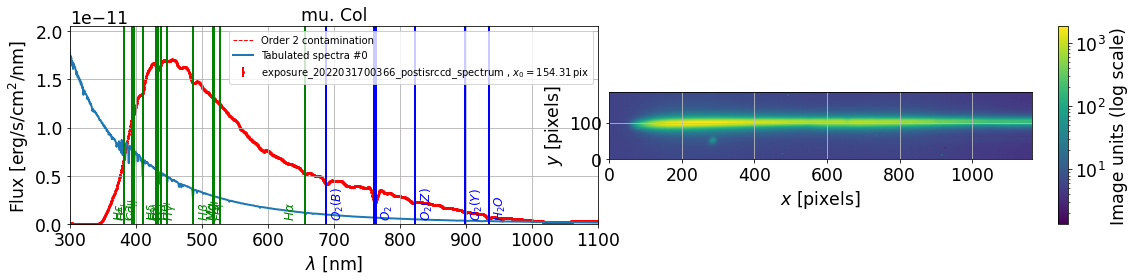

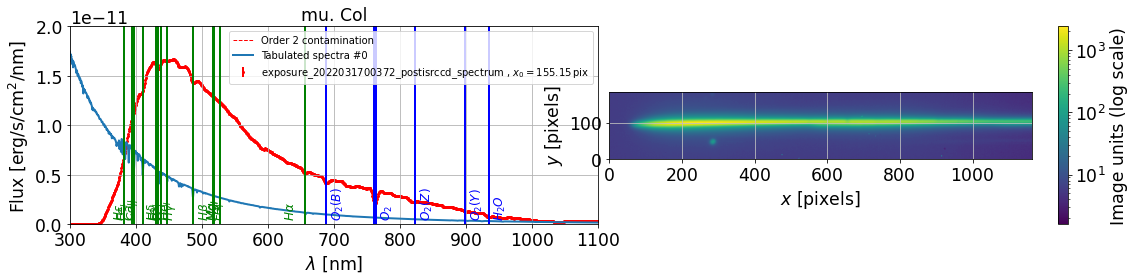

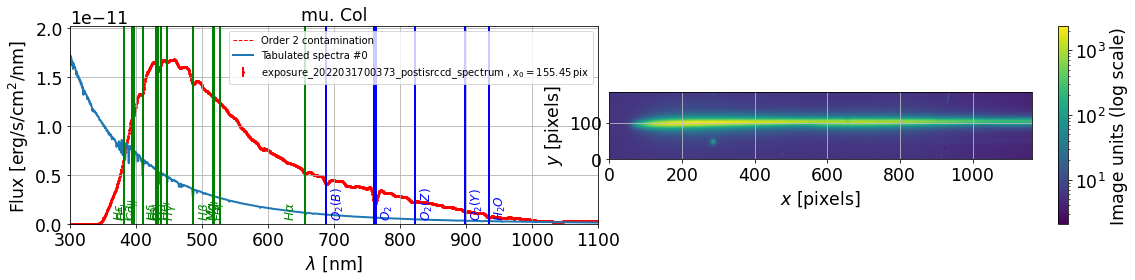

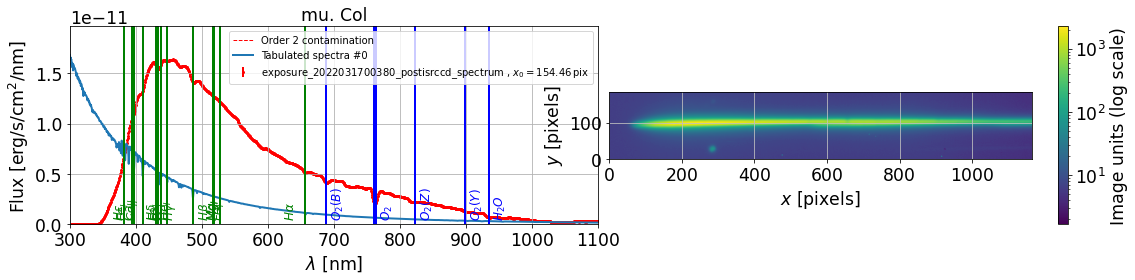

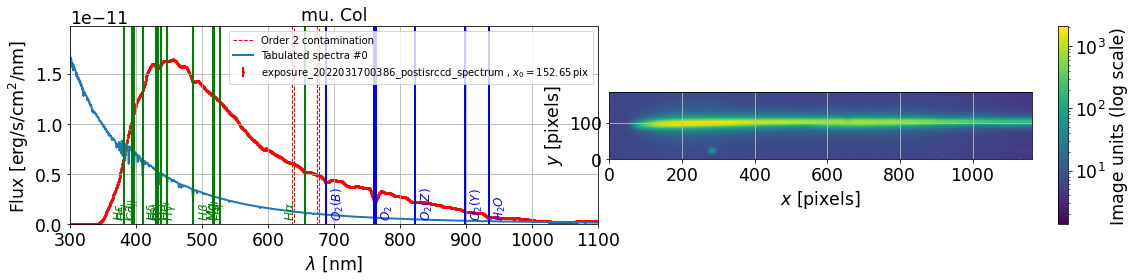

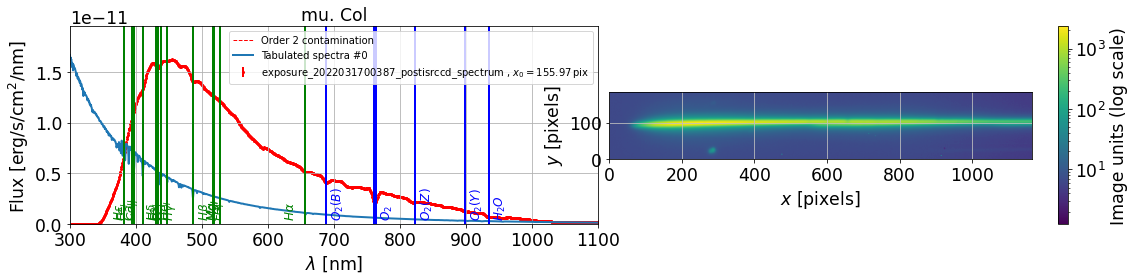

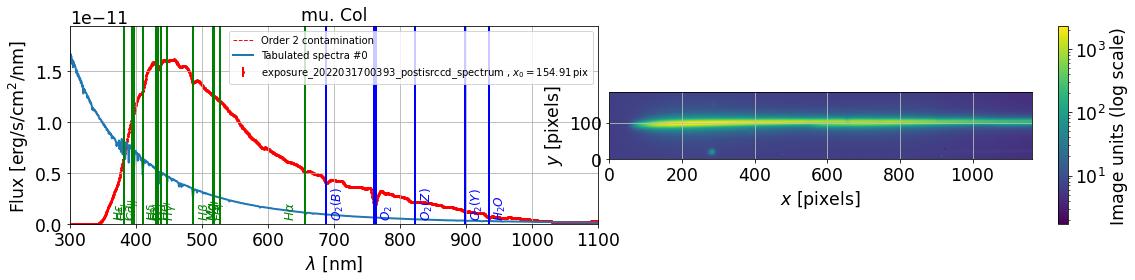

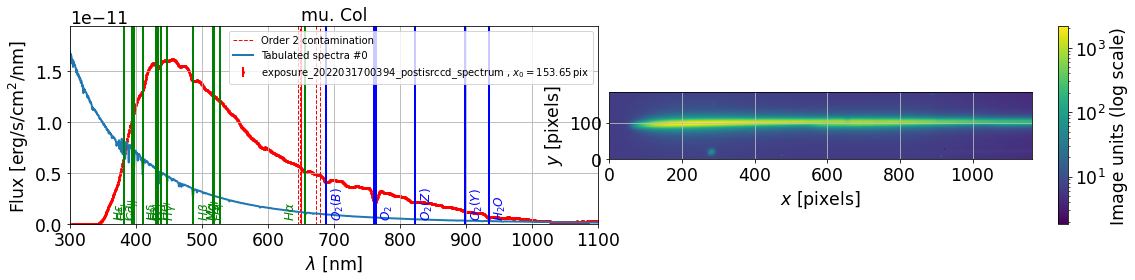

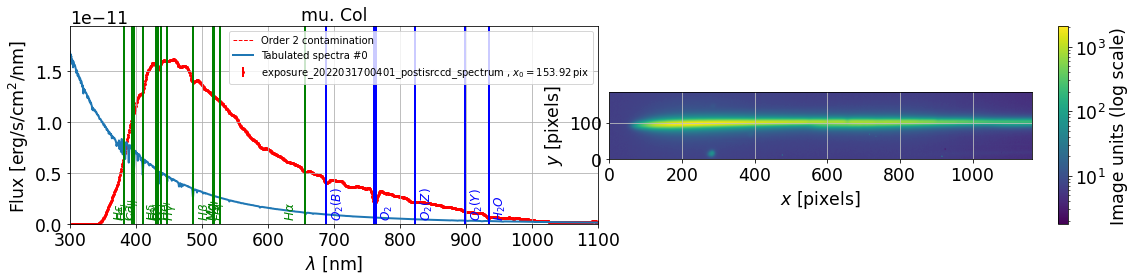

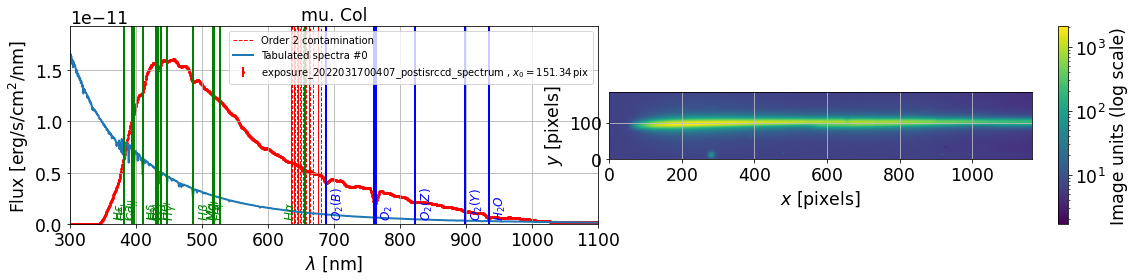

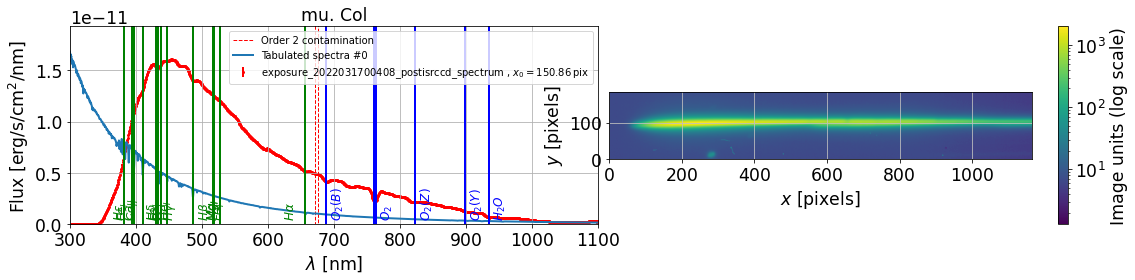

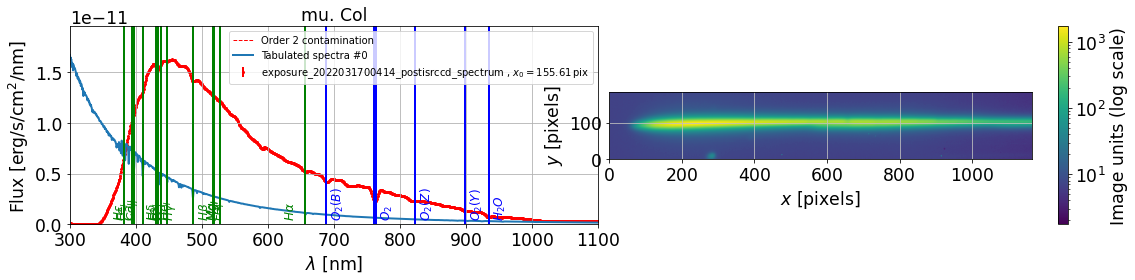

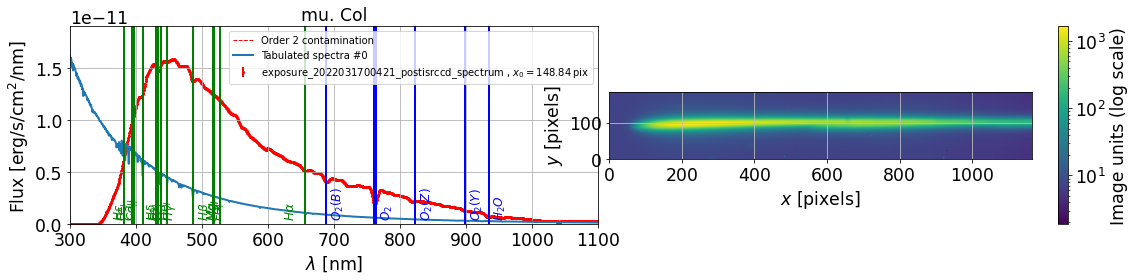

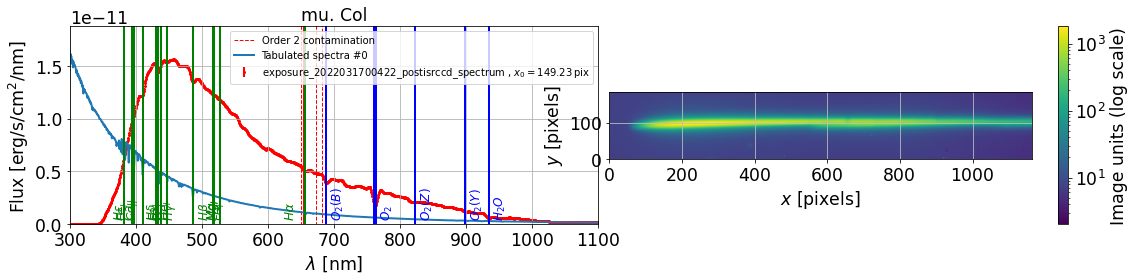

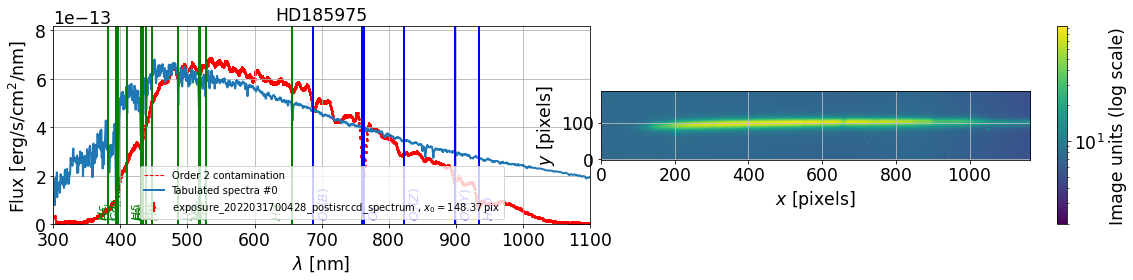

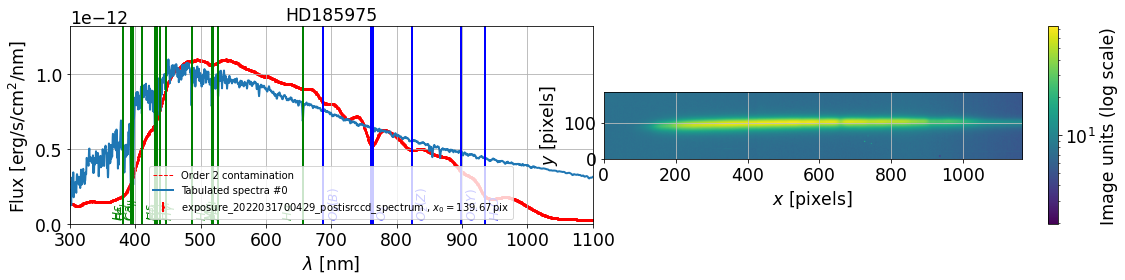

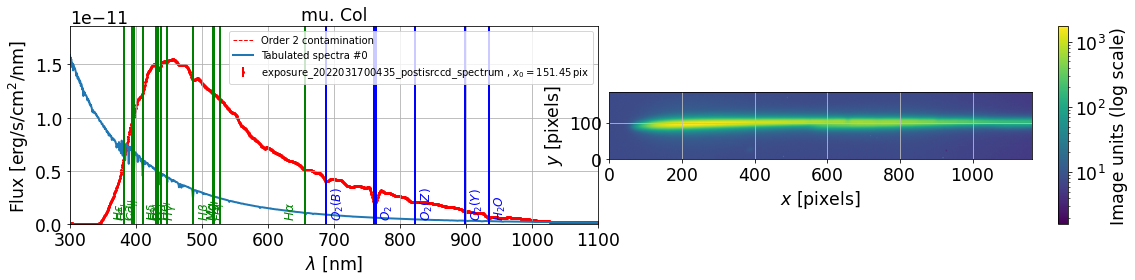

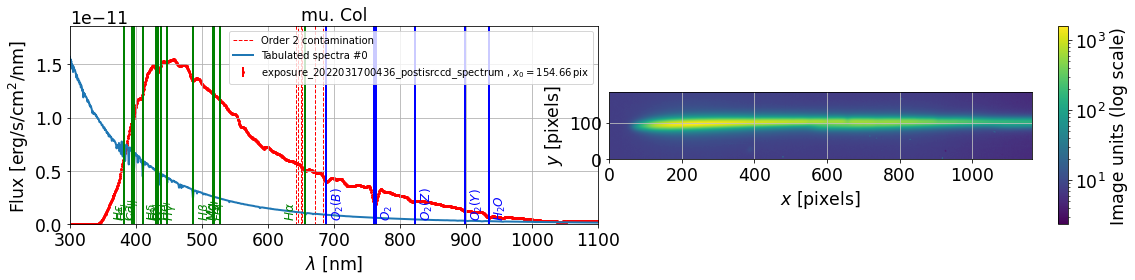

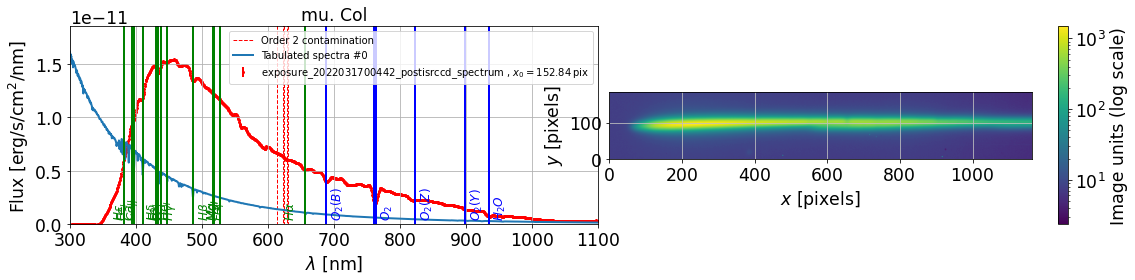

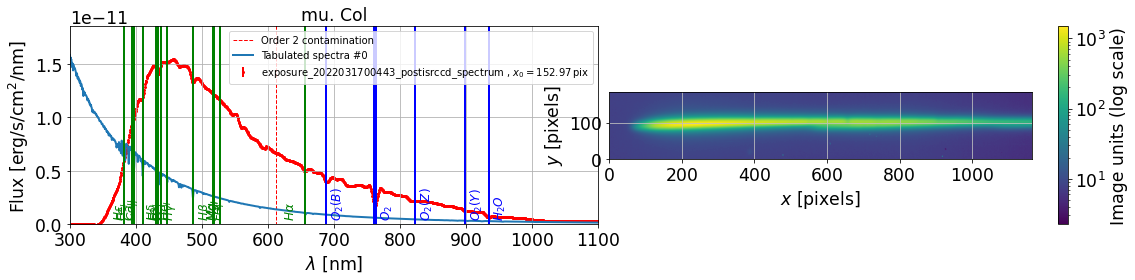

In [48]:
parameters.DISPLAY=True

FLAG_ORDER2 = True

infos = []
all_lambdas=[]
all_data=[]
all_data_err=[]

if FLAG_ORDER2:
    all_lambdas_order2=[]
    all_data_order2=[]
    all_data_err_order2=[]

all_num=[]
all_figs = []


idx=0
for fullfilename in all_good_spectra_spectrum_files:
    
    filename = os.path.basename(fullfilename)
    print(idx,")",filename," ",fullfilename)
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    
    filename= os.path.basename(fullfilename)
    tag=file_tag_forsorting(filename.split(".")[0])
    all_num.append(tag)
    
   
     
    s=Spectrum(fullfilename, config=config,fast_load=False)
    label=filename.split('.')[0]+" "
    s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
    all_lambdas.append(s.lambdas)
    all_data.append(s.data)
    all_data_err.append(s.err)
    
    if FLAG_ORDER2:
        all_lambdas_order2.append(s.lambdas_order2)
        all_data_order2.append(s.data_order2)
        all_data_err_order2.append(s.err_order2)
    
    ax2 = fig.add_subplot(1, 2, 2)
    
    fullfilename2=all_files_spectrogram[idx]
    
    s.load_spectrogram(fullfilename2)
    s.plot_spectrogram(ax=ax2,scale="log")
    
    
    infos.append([idx,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
    
    
    plt.show()
    all_figs.append(fig)
    
    idx+=1
    

## View one spectrum

1 ) exposure_2022031700244_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_spectrum.fits
set date_obs to 2022-03-18T00:54:16.312
set expo to 20.0
set airmass to 1.121576965054115
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1741806116248446
set dec to -32.3064444444444
set hour_angle to 31.60492174100415
set temperature to 8.9
set pressure to 743.45
set humidity to 49.0
set lambda_ref to 626.883564656571
set parallactic_angle to 94.10618686949074
target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ... Z_VALUE_45 SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                            
--------- ------------- ------------- ... ---------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ...  0.0003640                1


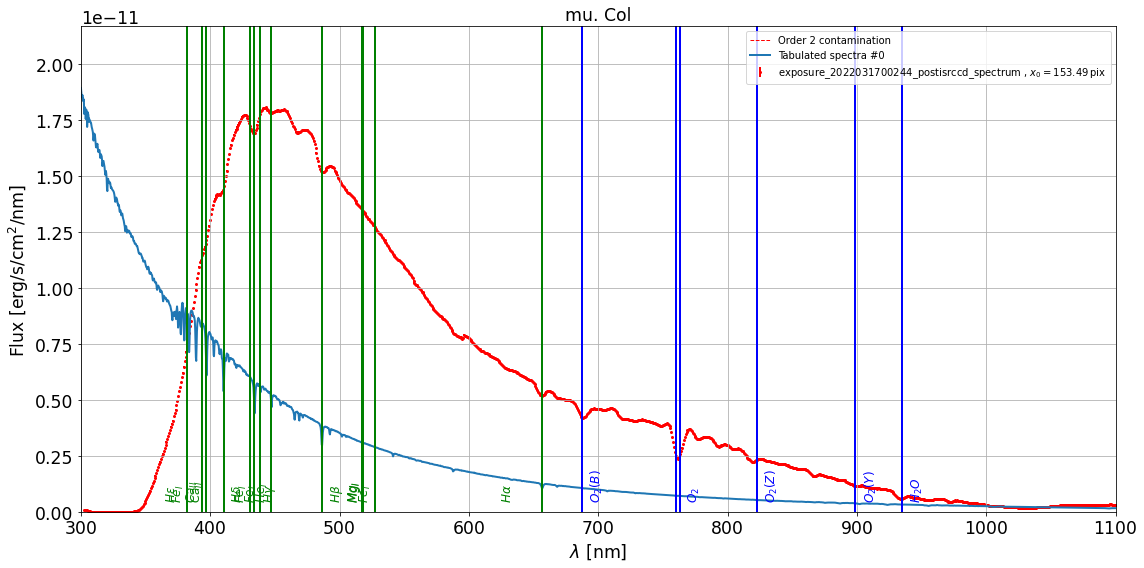

In [49]:
idx=1

fullfilename = all_good_spectra_spectrum_files[idx]
    
filename = os.path.basename(fullfilename)
print(idx,")",filename," ",fullfilename)
    
    
fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
    
filename= os.path.basename(fullfilename)
tag=file_tag_forsorting(filename.split(".")[0])
all_num.append(tag)
    
   
     
s=Spectrum(fullfilename, config=config,fast_load=False)
label=filename.split('.')[0]+" "
s.plot_spectrum(ax=ax1,force_lines=True,label=label)
#s.plot_spectrum(ax=ax1,force_lines=True)
ax1.plot(all_lambdas_order2[idx],all_data_order2[idx])
    
    
#ax2 = fig.add_subplot(1, 2, 2)
    
#fullfilename2=all_files_spectrogram[idx]
    
#s.load_spectrogram(fullfilename2)
#s.plot_spectrogram(ax=ax2,scale="log")
    

plt.show()
    
WLMIN = all_lambdas_order2[idx].min()    
WLMAX = all_lambdas_order2[idx].max()    

# Work on absorption patterns

In [51]:
TOPDIR="libradtran_out"
SUBDIR=["atm_abs_o2","atm_abs_o2o3","atm_abs_o2h2o"]

### Read files

#### read Pure O2 and NO2 profile

In [52]:
dir=os.path.join(TOPDIR,SUBDIR[0])
listoffiles=os.listdir(dir)
listoffiles_sorted=sorted(listoffiles)

In [53]:
all_wl=[]
all_transmo2=[]
index=0
for thefile in listoffiles_sorted:
    data = np.loadtxt(os.path.join(dir,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    all_transmo2.append(atm)
    all_wl.append(wl)
    index+=1

In [54]:
# decode airmass number
tag="^RT_MPL_pp_us_ab_rtvis_z([0-9]+)_*"
str_num= [re.findall(tag,filename)[0] for filename in listoffiles_sorted]

### read O3 profile

In [55]:
dir=os.path.join(TOPDIR,SUBDIR[1])
listoffiles=os.listdir(dir)
listoffiles_sorted=sorted(listoffiles)

In [56]:
all_wl=[]
all_transmo3=[]
index=0
for thefile in listoffiles_sorted:
    data = np.loadtxt(os.path.join(dir,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    atmo3 = atm/all_transmo2[index]
    all_transmo3.append(atmo3)
    all_wl.append(wl)
    index+=1

### Read PWV profile

In [57]:
dir=os.path.join(TOPDIR,SUBDIR[2])
listoffiles=os.listdir(dir)
listoffiles_sorted=sorted(listoffiles)

In [58]:
all_wl=[]
all_transmh2o=[]
index=0
for thefile in listoffiles_sorted:
    data = np.loadtxt(os.path.join(dir,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    atmh2o = atm/all_transmo2[index]
    all_transmh2o.append(atmh2o)
    all_wl.append(wl)
    index+=1

## Separate O2 and NO2

In [59]:
NBOBS=len(all_transmo2)

In [60]:
WLMINO2=600
WLMAXO2=800
WLMINNO2=300
WLMAXNO2=600

In [61]:
all_transmno2=all_transmo2

In [62]:
clean_index_in_o2=np.where(np.logical_or(wl<WLMINO2,wl>WLMAXO2))[0]
keep_index_in_o2=np.where(np.logical_and(wl>WLMINO2,wl<WLMAXO2))[0]
clean_index_in_no2=np.where(wl>WLMAXNO2)[0]

In [63]:
all_transm_no2_clean=[]
all_transm_o2_clean=[]

for index in np.arange(NBOBS): 
    transm_o2=np.copy(all_transmo2[index])
    transm_no2=np.copy(all_transmo2[index])
    transm_o2[clean_index_in_o2]=1
    transm_no2[clean_index_in_no2]=1
    all_transm_no2_clean.append(transm_no2)
    all_transm_o2_clean.append(transm_o2)


# Plot

In [64]:

jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange( NBOBS), alpha=1)

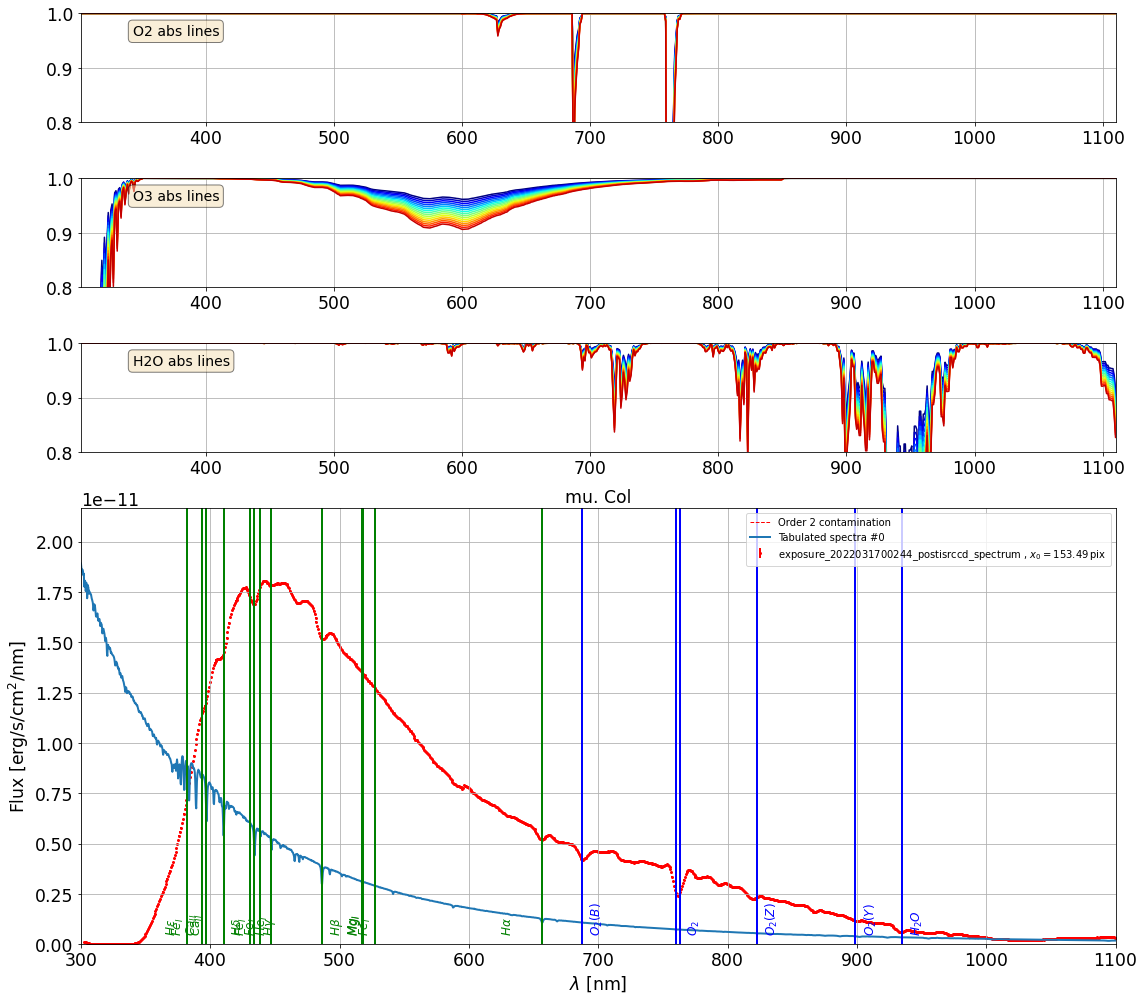

In [65]:
figsize=(16,14)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig=plt.figure(figsize=figsize)
    
gs = gridspec.GridSpec(4, 1,height_ratios=[0.5,0.5,0.5,2] ,figure=fig)
    
ax=fig.add_subplot(gs[0,0])
for index in np.arange(NBOBS):   
    ax.plot(wl,all_transm_o2_clean[index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.set_xlim(WLMIN,WLMAX)
ax.grid()
textstr = "O2 abs lines"
# place a text box in upper left in axes coords
ax.text(0.05, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax=fig.add_subplot(gs[1,0])
for index in np.arange(NBOBS):   
    ax.plot(wl,all_transmo3[index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.set_xlim(WLMIN,WLMAX)
ax.grid()
textstr = "O3 abs lines"
# place a text box in upper left in axes coords
ax.text(0.05, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax=fig.add_subplot(gs[2,0])

for index in np.arange(NBOBS):   
    ax.plot(wl,all_transmh2o[index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.set_xlim(WLMIN,WLMAX)
ax.grid()
textstr = "H2O abs lines"
# place a text box in upper left in axes coords
ax.text(0.05, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


ax=fig.add_subplot(gs[3,0])
s.plot_spectrum(ax=ax,force_lines=True,label=label)

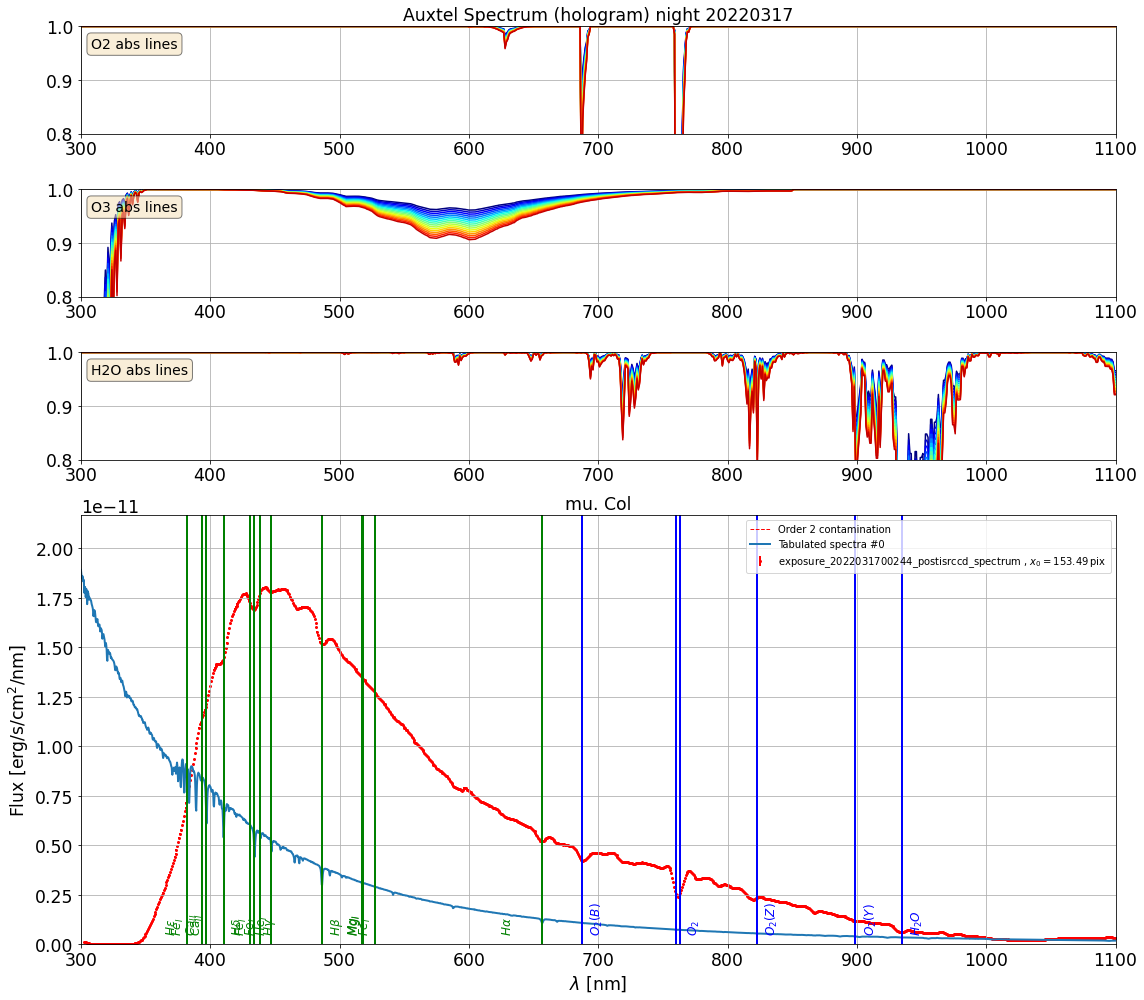

In [66]:
figsize=(16,14)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig=plt.figure(figsize=figsize)
title =f"Auxtel Spectrum (hologram) night {DATE}"


gs = gridspec.GridSpec(4, 1,height_ratios=[0.5,0.5,0.5,2] ,figure=fig)
    
# O2    
ax=fig.add_subplot(gs[0,0])
for index in np.arange(NBOBS):   
    ax.plot(wl,all_transm_o2_clean[index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.set_xlim(WLMIN,WLMAX)
ax.grid()
textstr = "O2 abs lines"
# place a text box in upper left in axes coords
ax.text(0.01, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_title(title)
main_ax = ax

# Ozone
ax=fig.add_subplot(gs[1,0], sharex=main_ax)
for index in np.arange(NBOBS):   
    ax.plot(wl,all_transmo3[index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.set_xlim(WLMIN,WLMAX)
ax.grid()
textstr = "O3 abs lines"
# place a text box in upper left in axes coords
ax.text(0.01, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


# H2O
ax=fig.add_subplot(gs[2,0], sharex=main_ax)

for index in np.arange(NBOBS):   
    ax.plot(wl,all_transmh2o[index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.grid()
textstr = "H2O abs lines"
# place a text box in upper left in axes coords
ax.text(0.01, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


# spectrum
ax=fig.add_subplot(gs[3,0], sharex=main_ax)
s.plot_spectrum(ax=ax,force_lines=True,label=label)




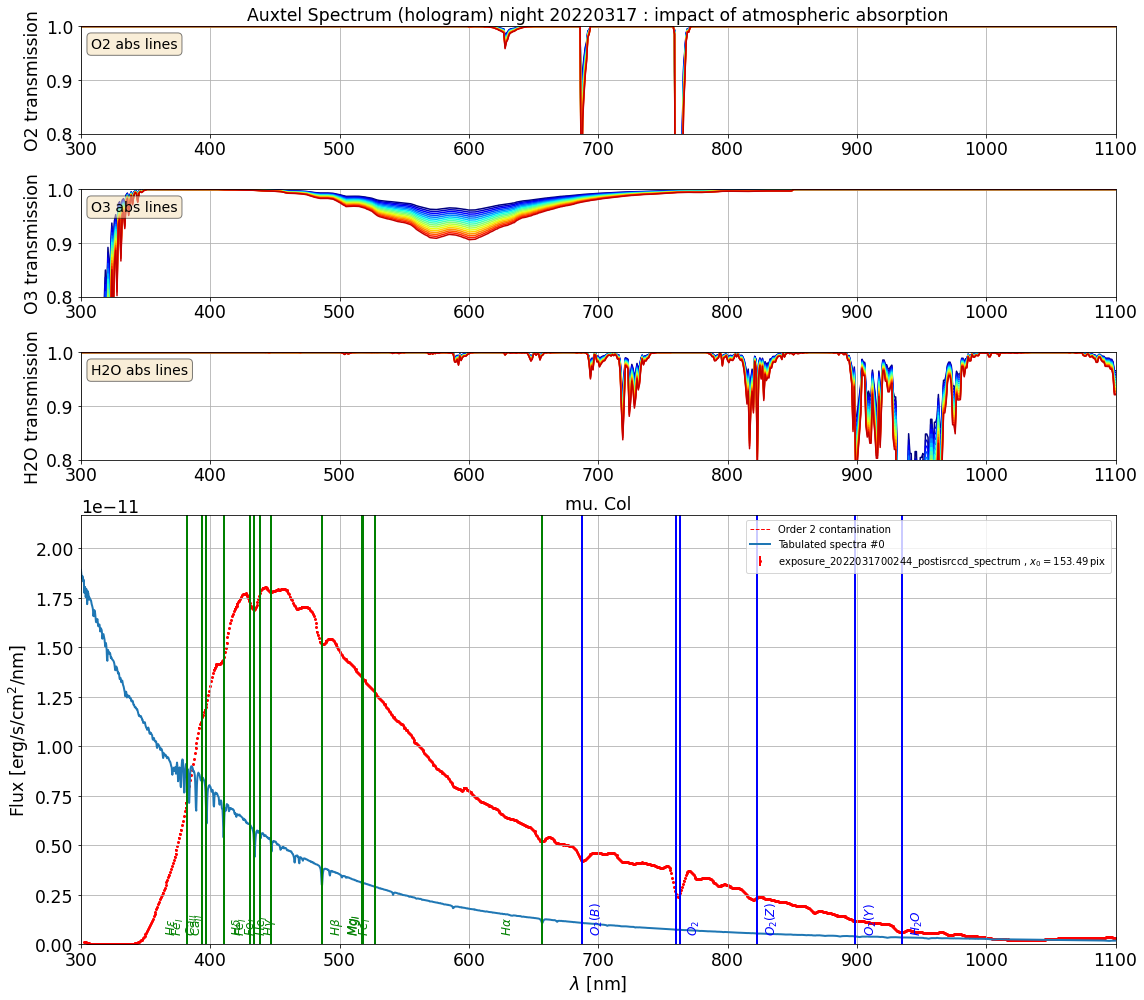

In [67]:
figsize=(16,14)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig=plt.figure(figsize=figsize)
title =f"Auxtel Spectrum (hologram) night {DATE} : impact of atmospheric absorption"


gs = gridspec.GridSpec(4, 1,height_ratios=[0.5,0.5,0.5,2] ,figure=fig)
    
# O2    
ax=fig.add_subplot(gs[0,0])
for index in np.arange(NBOBS):   
    ax.plot(wl,all_transm_o2_clean[index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.set_xlim(WLMIN,WLMAX)
ax.grid()
textstr = "O2 abs lines"
# place a text box in upper left in axes coords
ax.text(0.01, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_title(title)
ax.set_ylabel("O2 transmission")
main_ax = ax

# Ozone
ax=fig.add_subplot(gs[1,0], sharex=main_ax)
for index in np.arange(NBOBS):   
    ax.plot(wl,all_transmo3[index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.set_ylabel("O3 transmission")
ax.grid()
textstr = "O3 abs lines"
# place a text box in upper left in axes coords
ax.text(0.01, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


# H2O
ax=fig.add_subplot(gs[2,0], sharex=main_ax)

for index in np.arange(NBOBS):   
    ax.plot(wl,all_transmh2o[index],'-',color=all_colors[index])
ax.set_ylim(0.8,1)
ax.grid()
ax.set_ylabel("H2O transmission")
textstr = "H2O abs lines"
# place a text box in upper left in axes coords
ax.text(0.01, 0.90, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


# spectrum
ax=fig.add_subplot(gs[3,0], sharex=main_ax)
s.plot_spectrum(ax=ax,force_lines=True,label=label)

